# Assignment 1 CS 419: Vector Representation of the Target Variable (y)
**Student 1 Name**: Vedika Doke\
**Student 1 Roll**: 24B1231\
**Student 2 Name**: Aditya Khambete\
**Student 2 Roll**: 23B3315

---
This notebook is a self-contained submission for Assignment 1 Group T. It includes both the implementation and the wiki article. All cells can be run sequentially to view the results

## Part 1: The Code Implementation
This section contains the Python code and step by step explaination for loading data, extracting the target variable `y` and performing an analysis of its distribution.

### Step 1: Setup
This step imports all the relevant libraries, and loads the credit card fraud dataset from a public URL.

In [ ]:
# Importing the standard DS libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
"""
Dataset Structure
---------------------------------------
The dataset is a result of a PCA Dimensionality reduction to protect user identities
and sensitive features(v1-v28)
"""
df = pd.read_csv(url) # Loading the dataset from the URL
print('Dataset loaded successfully, here are the first few rows:')
print(df.head())

Dataset loaded successfully, here are the first few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13745

### Step 2: Extracting the Target Variable `y`
This step isolates the target variable, which is stored in the row 'Class' in the DataFrame.

In [ ]:
y_vector = df['Class'].to_numpy() # Loads the output vector into a NumPy vector, the standard format for ML

In [ ]:
print(f'Shape of the target vector: {y_vector.shape}')
print(f'First 15 elements of y: {y_vector[:15]}') # Printing the first few elements

# Note that 1 represents fraud, while 0 represents legitimate

Shape of the target vector: (284807,)
First 15 elements of y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Step 3: Performing Vector Analysis
This step does some operations to understand the distribution. This reveals the severe class imbalance, a critical insight for this particular problem.

In [ ]:
fraud_rate = np.mean(y_vector) # In a binary vector, mean gives proportion of the positive class
print(f'Mean of y (Fraud Rate) = {fraud_rate}')
print(f"This means the fraud rate in the dataset is: {fraud_rate:.4%}\n")

Mean of y (Fraud Rate) = 0.001727485630620034
This means the fraud rate in the dataset is: 0.1727%



In [ ]:
classes, counts = np.unique(y_vector, return_counts=True) # To find the absolute number of transactions in each class
print(f'Class 0 (Not Fraud): {counts[0]}')
print(f'Class 1 (Fraud): {counts[1]}')

Class 0 (Not Fraud): 284315
Class 1 (Fraud): 492


### Step 4: Visualizing the Distribution
This section visualizes the distribution of the target vector `y`

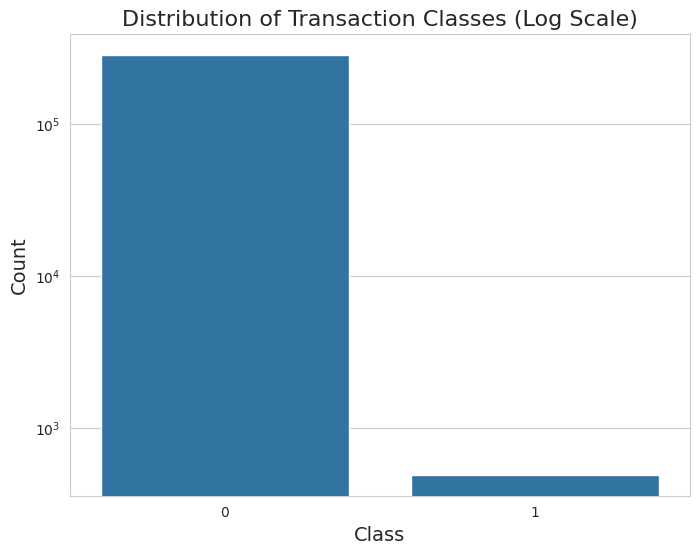

In [ ]:
# The visual style
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))

# Count Plot
plot = sns.countplot(x=y_vector)

# Adding labels and scale
plot.set_title('Distribution of Transaction Classes (Log Scale)', fontsize=16)
plot.set_xlabel('Class', fontsize=14)
plot.set_ylabel('Count', fontsize=14)
plt.yscale('log') # Logarithmic Scale, so that the tiny bar for fraudulent transactions is visible

# Display
plt.show()

## Part 2: The Wiki Article
This section presents the assignment's findings in the format of an encyclopedic wiki article.

### The Target Vector in FinTech applications
#### 1. Overview
In the FinTech domain, decision-making relies heavily on insights derived from transaction data. This data is a critical factor for applications such as fraud detection and loan approval. A foundational concept in building machine learning models for these tasks is the representation of the **target variable**, denoted as **y**, in a structured vector format. This vector, with a length `m` equal to the number of input instances, serves as the model’s ultimate prediction goal and must be accurately extracted from the dataset.

Using the credit card fraud detection dataset as an example, `y` is a variable that takes a value of either `0` (legitimate transaction) or `1` (fraudulent transaction). Representing this as a column vector allows for direct mathematical operations and analysis, such as calculating the percentage of fraudulent cases relative to all transactions [Lec 1; Slide 19].

The concept also extends to multilingual data handling, where input features (`x`) may exist in multiple languages, but the target vector `y` remains a consistent numerical value. Finally, analyzing the distribution of `y` is essential to understand potential imbalances, such as the ratio of fraudulent to non-fraudulent transactions, which is a key factor in designing effective fraud detection models.


#### 2. Methodology
In Machine Learning notation, the target vector `y` is formally represented as a column vector with `m` elements, where `m` represents the number of examples in the training dataset [Lec 1; Slide 19].

$y = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\y_m \end{bmatrix}$

Each $y_i$ denotes the known outcome for the *i-th* training example. It corresponds to the *i-th* row of the feature matrix $\Phi$, which contains the independent variable (the `x`) for that example.

#### 3. FinTech Applications
In financial technology, fraud detection systems rely on accurately identifying fraudulent transactions, which are typically rare compared to legitimate ones. In the dataset analyzed in this project, the ratio of fraudulent cases to total cases is approximately **0.17%**. Such a severe class imbalance can bias models toward predicting the majority class (non-fraud). Quantifying this imbalance by analyzing the distribution of `y` is a critical first step.

This analysis ensures that the machine learning pipeline is designed to address the dataset’s real-world imbalance, which may involve using specialized techniques. This leads to more reliable and effective fraud detection systems in FinTech applications.


#### 4. Multilingual Data Handling

In real-world FinTech scenarios, transaction details and other features (`x`) may be stored in multiple languages (e.g., English, Hindi, Marathi). A key challenge is to normalize these inputs so that a model can interpret them uniformly, while the target vector `y` remains consistent. For example, a loan default is `1` regardless of the language of the application.

A conceptual preprocessing approach includes these steps:
*   **Language Detection:** Identifying the language of each text entry.
*   **Translation or Multilingual Embeddings:** Converting all text into a single language (e.g., English) or using models that generate language-agnostic numerical embeddings.
*   **Vectorization:** Transforming the normalized text into a numerical format that the model can process.

Throughout this process, `y` is unchanged, as it is already in a uniform, language-agnostic numerical format. By unifying the multilingual input features, it can be ensured that the model’s interpretation of transactions is consistent, while `y` remains an accurate representation of the target.

The dataset in this project can be viewed as the *result* of such a process, where all original features, including any potential text data has been vectorized and anonymized via PCA into a numerical embedding suitable for a machine learning model.

#### 5. Implementation
The practical analysis was implemented in Python within the first part of this notebook. The high-level steps were:
*    **Setup:** The relevant libraries were loaded followed by the dataset of credit card fraud which was loaded from a public URL into a `pandas` DataFrame. The dataset is numerical and is a result of PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28).

*    **Extracting the Target Vector:** The target vector was loaded from the `Class` row in the DataFrame to a `numpy` vector `y_vector`
*    **Analysis:** Basic `numpy` operations were done on `y_vector` to calculate the mean of the vector (fraud rate), and the distribution among the two classes was counted.
*    **Visualisation:** The `seaborn` library was used to generate a count plot, visually demonstrating the class imbalance. Logarithmic scale was used on the y-axis for clarity.

#### 6. Conclusion
The target vector `y` is a fundamental concept in supervised machine learning. The proper extraction and representation of the target vector are the first steps towards building any predictive model. As demonstrated with the credit card fraud detection use-case, a preliminary analysis of the target vector provides critical insights such as class imbalance, which directly affects the strategy for model development, and hence ensures the creation of robust solutions.

#### Citations and References
1. CS 419 Slides, Autumn 2025, Prof. Ganesh Ramakrishnan
2. Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud